Text(0.5, 0, 'Epochs')

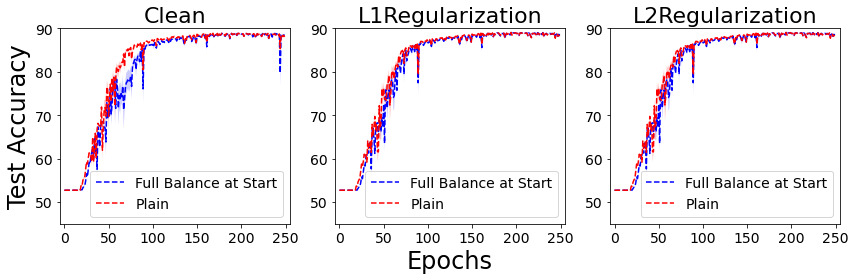

In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(1,3, figsize=(12, 4), layout='tight')
xval = np.arange(0, 100)

colors = ['blue', 'red']
labels = ['Full Balance at Start', 'Plain']


for fb in [0, 1]:
    for pos, method in enumerate(['Clean', 'L1Regularization', 'L2Regularization']):
        arr = []
        max_length = 0
        for iteration in range(2):
            x = pd.read_csv(f'../IMDB-RNN/hist/imdb/{method}-{iteration}-fbAtStart-{fb}-seed-{100+iteration}-frac-100.csv')
            arr.append(x['test_accuracy'])

        # Pad sequences to the same length
        arr = np.array(arr)
        mean = np.nanmean(arr, axis=0)*100
        std = np.nanstd(arr, axis=0)*100
        eps = np.arange(mean.shape[0])

        axs[pos].plot(eps, mean, colors[fb], linestyle='--', label=labels[fb])
        axs[pos].fill_between(eps, mean-(std/3), mean+(std/3), alpha=0.2, facecolor=colors[fb])
        axs[pos].set_xlim(-1, 250)
        axs[pos].set_ylim(45, 100)
        axs[pos].tick_params(axis='x', labelsize=14)
        axs[pos].tick_params(axis='y', labelsize=14)
        axs[pos].set_title(method, fontsize=22)
        # print(f'{method}: {max(mean)}')

# Set plot labels, title, and legend
axs[0].set_ylabel('Test Accuracy', fontsize=22)
# axs[1].set_ylabel('Test Accuracy', fontsize=22)
axs[0].legend(fontsize=14, loc='lower right')
axs[1].legend(fontsize=14, loc='lower right')
axs[2].legend(fontsize=14, loc='lower right')
axs[0].set_xticks(range(0, 251, 50), fontsize=12)
axs[1].set_xticks(range(0, 251, 50), fontsize=12)
axs[2].set_xticks(range(0, 251, 50), fontsize=12)
axs[0].set_ylim(45, 90)
axs[0].set_xlim(-5, 255)
axs[1].set_ylim(45, 90)
axs[1].set_xlim(-5, 255)
axs[2].set_ylim(45, 90)
axs[2].set_xlim(-5, 255)

axs[0].set_ylabel('Test Accuracy', fontsize=24)
axs[1].set_xlabel('Epochs', fontsize=24)

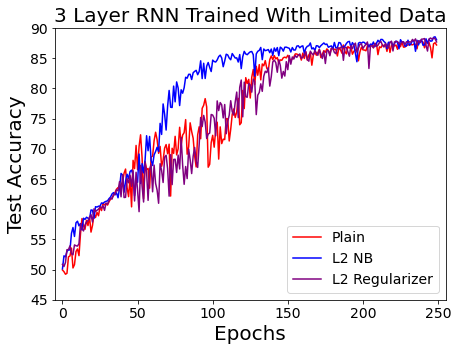

In [2]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'purple', 'orange', 'green']
labels = ['Plain', 'L2 NB', 'L2 Regularizer']
plt.figure(figsize=(7, 5))
for model in ['largeFCN']:
    for fb in [0]:
        for pos, method in enumerate(['Clean', 'L2NB', 'L2Regularization']):
            arr = []
            for iteration in range(5):
                with open(f'../IMDB-RNN/hist/3layers05/{method}-{iteration}-fbAtStart-{fb}.pkl', 'rb') as f:
                    arr.append(pickle.load(f)['test_acc'])
            arr=np.array(arr)
            mean = np.mean(arr, axis = 0)*100
            std = np.std(arr, axis=0)
            eps = np.arange(mean.shape[0])
            plt.plot(eps, mean, colors[pos], linestyle = '-', label = labels[pos])
            # print(max(mean))
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Test Accuracy', fontsize = 20)
plt.legend(fontsize=14, loc = 'lower right')
plt.xticks(range(0, 251, 50), fontsize=12)
plt.yticks(range(45, 91, 5), fontsize=12)
plt.title('3 Layer RNN Trained With Limited Data', fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(45, 90)
plt.xlim(-5, 255)

plt.show()